<a href="https://colab.research.google.com/github/ArunRoshan143/BITCOIN-PRICE-prediction/blob/main/BITCOIN%20PRICE%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mwclient

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import mwclient #lightweight client lib for the MediaWiki API
import time     #used to manipulate tym

site = mwclient.Site("en.wikipedia.org")
page = site.pages["Bitcoin"]
revs=list(page.revisions())
revs[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OrderedDict([('revid', 1225814205),
             ('parentid', 1225513035),
             ('minor', ''),
             ('user', 'Dogman15'),
             ('timestamp',
              time.struct_time(tm_year=2024, tm_mon=5, tm_mday=26, tm_hour=21, tm_min=38, tm_sec=53, tm_wday=6, tm_yday=147, tm_isdst=-1)),
             ('comment',
              "/* Use for payments */ finishing list with the word 'and'")])

In [ ]:
revs=sorted(revs,key=lambda rev:rev["timestamp"])
revs[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OrderedDict([('revid', 275832581),
             ('parentid', 0),
             ('user', 'Pratyeka'),
             ('timestamp',
              time.struct_time(tm_year=2009, tm_mon=3, tm_mday=8, tm_hour=16, tm_min=41, tm_sec=7, tm_wday=6, tm_yday=67, tm_isdst=-1)),
             ('comment', 'creation (stub)')])

In [ ]:
!pip install transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from transformers import pipeline
sentiment_pipeline=pipeline("sentiment-analysis")
def find_sentiment(text):
  sent=sentiment_pipeline([text[:250]])[0]
  score=sent["score"]
  if sent["label"]=="NEGATIVE":
    score+=-1
  return score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
find_sentiment("i hate you")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-0.0008870959281921387

In [ ]:
edits = {}

for rev in revs:
  date = time.strftime("%Y-%m-%d", rev ["timestamp"])
  if date not in edits:
    edits[date] = dict(sentiments=list(), edit_count=0)
  edits[date]["edit_count"] += 1
  comment = rev.get("comment", "")
  edits[date]["sentiments"].append(find_sentiment(comment))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from statistics import mean

for key in edits:
  if len(edits[key]["sentiments"]) > 0:
    edits[key]["sentiment"] = mean(edits[key]["sentiments"])
    edits[key]["neg_sentiment"] = len([s for s in edits[key]["sentiments"] if s < 0]) / len(edits[key]["sentiments"])
  else:
    edits[key]["sentiment"]=0
    edits[key]["neg_sentiment"]=0

  del edits[key]["sentiments"]





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
edits_df=pd.DataFrame.from_dict(edits,orient="index")
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,4,0.174585,0.750000
2009-08-05,1,0.748121,0.000000
2009-08-06,2,0.995746,0.000000
2009-08-14,1,0.930021,0.000000
2009-10-13,2,0.267936,0.500000
...,...,...,...
2024-05-16,1,-0.114030,1.000000
2024-05-21,4,0.235169,0.750000
2024-05-22,9,0.383666,0.555556
2024-05-24,1,-0.001473,1.000000


In [ ]:
edits_df.index=pd.to_datetime(edits_df.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from datetime import datetime
dates=pd.date_range(start="2009-03-08",end=datetime.today())
dates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DatetimeIndex(['2009-03-08', '2009-03-09', '2009-03-10', '2009-03-11',
               '2009-03-12', '2009-03-13', '2009-03-14', '2009-03-15',
               '2009-03-16', '2009-03-17',
               ...
               '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06',
               '2024-06-07', '2024-06-08', '2024-06-09', '2024-06-10',
               '2024-06-11', '2024-06-12'],
              dtype='datetime64[ns]', length=5576, freq='D')

In [ ]:
edits_df=edits_df.reindex(dates,fill_value=0)
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,4,0.174585,0.75
2009-03-09,0,0.000000,0.00
2009-03-10,0,0.000000,0.00
2009-03-11,0,0.000000,0.00
2009-03-12,0,0.000000,0.00
...,...,...,...
2024-06-08,0,0.000000,0.00
2024-06-09,0,0.000000,0.00
2024-06-10,0,0.000000,0.00
2024-06-11,0,0.000000,0.00


In [ ]:
rolling_edits = edits_df.rolling(30).mean()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rolling_edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,NaN,NaN,NaN
2009-03-09,NaN,NaN,NaN
2009-03-10,NaN,NaN,NaN
2009-03-11,NaN,NaN,NaN
2009-03-12,NaN,NaN,NaN
...,...,...,...
2024-06-08,0.600000,0.032136,0.160185
2024-06-09,0.600000,0.032136,0.160185
2024-06-10,0.600000,0.032136,0.160185
2024-06-11,0.600000,0.032136,0.160185


In [ ]:
rolling_edits=rolling_edits.dropna()
rolling_edits


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,0.005820,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-06-08,0.600000,0.032136,0.160185
2024-06-09,0.600000,0.032136,0.160185
2024-06-10,0.600000,0.032136,0.160185
2024-06-11,0.600000,0.032136,0.160185


In [ ]:
rolling_edits.to_csv("wikipedia_edits.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import yfinance as yf
import os


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc_ticker=yf.Ticker("BTC-USD")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc=btc_ticker.history(period='max')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# btc.index=pd.to_datetime(btc.index)
btc.index = btc.index.tz_localize(None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-06-07,70759.187500,71907.851562,68507.257812,69342.585938,36188381096
2024-06-08,69324.179688,69533.320312,69210.742188,69305.773438,14262185861
2024-06-09,69297.492188,69817.523438,69160.843750,69647.992188,13534028500


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc.colums=[c.lower() for c in btc.columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-163-6be110daccee>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  btc.colums=[c.lower() for c in btc.columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

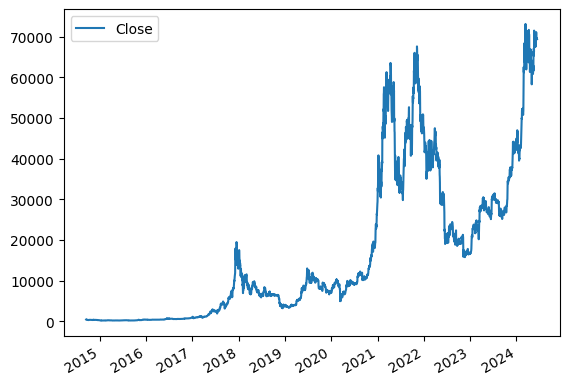

In [ ]:
btc.plot.line(y="Close",use_index=True)

In [ ]:
wiki=pd.read_csv("wikipedia_edits.csv",index_col=0,parse_dates=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
wiki

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,0.005820,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-06-08,0.600000,0.032136,0.160185
2024-06-09,0.600000,0.032136,0.160185
2024-06-10,0.600000,0.032136,0.160185
2024-06-11,0.600000,0.032136,0.160185


In [ ]:
btc=btc.merge(wiki, left_index=True, right_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,edit_count_x,sentiment_x,neg_sentiment_x,tomorrow,edit_count_y,sentiment_y,neg_sentiment_y
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,0.244480,0.532718,424.440002,5.033333,0.244480,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,0.245048,0.532718,394.795990,5.066667,0.245048,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,0.255974,0.549385,408.903992,5.200000,0.255974,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,0.259807,0.549385,398.821014,5.200000,0.259807,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,0.272244,0.532718,402.152008,5.233333,0.272244,0.532718
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07,70759.187500,71907.851562,68507.257812,69342.585938,36188381096,0.600000,0.032136,0.160185,69305.773438,0.600000,0.032136,0.160185
2024-06-08,69324.179688,69533.320312,69210.742188,69305.773438,14262185861,0.600000,0.032136,0.160185,69647.992188,0.600000,0.032136,0.160185
2024-06-09,69297.492188,69817.523438,69160.843750,69647.992188,13534028500,0.600000,0.032136,0.160185,69512.281250,0.600000,0.032136,0.160185
2024-06-10,69644.312500,70146.070312,69232.421875,69512.281250,20597699541,0.600000,0.032136,0.160185,69349.695312,0.600000,0.032136,0.160185


In [ ]:
btc["tomorrow"]=btc["Close"].shift(-1)
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,edit_count_x,sentiment_x,neg_sentiment_x,tomorrow,edit_count_y,sentiment_y,neg_sentiment_y
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,0.244480,0.532718,424.440002,5.033333,0.244480,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,0.245048,0.532718,394.795990,5.066667,0.245048,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,0.255974,0.549385,408.903992,5.200000,0.255974,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,0.259807,0.549385,398.821014,5.200000,0.259807,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,0.272244,0.532718,402.152008,5.233333,0.272244,0.532718
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07,70759.187500,71907.851562,68507.257812,69342.585938,36188381096,0.600000,0.032136,0.160185,69305.773438,0.600000,0.032136,0.160185
2024-06-08,69324.179688,69533.320312,69210.742188,69305.773438,14262185861,0.600000,0.032136,0.160185,69647.992188,0.600000,0.032136,0.160185
2024-06-09,69297.492188,69817.523438,69160.843750,69647.992188,13534028500,0.600000,0.032136,0.160185,69512.281250,0.600000,0.032136,0.160185
2024-06-10,69644.312500,70146.070312,69232.421875,69512.281250,20597699541,0.600000,0.032136,0.160185,69349.695312,0.600000,0.032136,0.160185


In [ ]:
btc["target"]=(btc["tomorrow"]>btc["Close"]).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc["target"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


target
1    1883
0    1673
Name: count, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100,min_samples_split=50,random_state=1)

train=btc.iloc[:-200]
test=btc[-200:]

predictors=["Close","Volume","Open","High","Low","edit_count_x","sentiment_x","neg_sentiment_x","edit_count_y","sentiment_y","neg_sentiment_y"]
model.fit(train[predictors],train["target"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(min_samples_split=50, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds=model.predict(test[predictors])
preds=pd.Series(preds,index=test.index)
precision_score(test["target"],preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.4444444444444444

In [ ]:
def predict(train,test,predictors,model):
  model.fit(train[predictors],train["target"])
  preds=model.predict(test[predictors])
  preds=pd.Series(preds,index=test.index,name="predictions")
  combined=pd.concat([test["target"],preds],axis=1)
  return combined
  # precision_score(test["target"],preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def backtest(data,model,predictors,start=1095,step=150):
  all_predictions=[]

  for i in range(start,data.shape[0],step):
    train=data.iloc[0:i].copy()
    test=data.iloc[i:(i+step)].copy()
    predictions=predict(train,test,predictors,model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier(random_state=1,learning_rate=0.1,n_estimators=200)
predictions=backtest(btc,model,predictors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
precision_score(predictions["target"],predictions["predictions"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.49763991908294

In [ ]:
def compute_rolling(btc):
  horizons=[2,7,60,365]
  new_predictors=["Close","sentiment_x","sentiment_y","neg_sentiment_x","neg_sentiment_y"]

  for horizon in horizons:
    rolling_averages=btc.rolling(horizon,min_periods=1).mean()

    ratio_column=f"Close_Ratio_{horizon}"
    btc[ratio_column]=btc["Close"]/rolling_averages["Close"]

    edit_column=f"edit_{horizon}"
    btc[edit_column]=rolling_averages["edit_count_x"]/rolling_averages["edit_count_y"]
    # btc[edit_column]=rolling_averages["edit_count"]

    rolling=btc.rolling(horizon,closed="left",min_periods=1).mean()
    trend_column=f"Close_Ratio_{horizon}"
    btc[trend_column]=rolling["target"]

    new_predictors+=[ratio_column,trend_column,edit_column]
  return btc,new_predictors


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc,new_predictors=compute_rolling(btc.copy())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,edit_count_x,sentiment_x,neg_sentiment_x,tomorrow,edit_count_y,...,Close_Ratio_365,edit_365,Close_Ratio_2_0,edit_2_0,Close_Ratio_7_1,edit_7_1,Close_Ratio_60_2,edit_60_2,Close_Ratio_365_3,edit_365_3
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,0.244480,0.532718,424.440002,5.033333,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,0.245048,0.532718,394.795990,5.066667,...,0.000000,1.0,0.0,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,0.255974,0.549385,408.903992,5.200000,...,0.000000,1.0,0.0,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,0.259807,0.549385,398.821014,5.200000,...,0.333333,1.0,0.5,1.0,0.333333,1.0,0.333333,1.0,0.333333,1.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,0.272244,0.532718,402.152008,5.233333,...,0.250000,1.0,0.5,1.0,0.250000,1.0,0.250000,1.0,0.250000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07,70759.187500,71907.851562,68507.257812,69342.585938,36188381096,0.600000,0.032136,0.160185,69305.773438,0.600000,...,0.517808,1.0,0.0,1.0,0.714286,1.0,0.483333,1.0,0.517808,1.0
2024-06-08,69324.179688,69533.320312,69210.742188,69305.773438,14262185861,0.600000,0.032136,0.160185,69647.992188,0.600000,...,0.517808,1.0,0.0,1.0,0.571429,1.0,0.483333,1.0,0.517808,1.0
2024-06-09,69297.492188,69817.523438,69160.843750,69647.992188,13534028500,0.600000,0.032136,0.160185,69512.281250,0.600000,...,0.520548,1.0,0.5,1.0,0.571429,1.0,0.483333,1.0,0.520548,1.0
2024-06-10,69644.312500,70146.070312,69232.421875,69512.281250,20597699541,0.600000,0.032136,0.160185,69349.695312,0.600000,...,0.517808,1.0,0.5,1.0,0.428571,1.0,0.483333,1.0,0.517808,1.0


In [ ]:
predictions=backtest(btc,model,new_predictors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: feature_names must be unique. Duplicates found: ['Close_Ratio_2', 'Close_Ratio_365', 'Close_Ratio_60', 'Close_Ratio_7']

In [ ]:
precision_score(predictions["target"],predictions["predictions"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.49763991908294

In [ ]:
predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,target,predictions
2017-09-16,0,0
2017-09-17,1,1
2017-09-18,0,1
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2024-06-07,0,1
2024-06-08,1,1
2024-06-09,0,1
2024-06-10,0,1
